In [17]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
import numpy as np
import sklearn.metrics as metrics
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

We have imported needed libraries and modules, now we are reasing our data from the csv fie using pandas. then spliting it into x and y and scaling x datas so that values will be between 0 and 1

In [2]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

x_train, y_train, x_test, y_test = train.iloc[:,1:], train.iloc[:,:1], test.iloc[:,1:], test.iloc[:,:1]
x_train,x_test = x_train/255. , x_test/255. 

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
y_test_labelled = pd.DataFrame([class_names[y_test.iloc[i].item()] for i in range(10000)])
y_train_labelled = pd.DataFrame([class_names[y_train.iloc[i].item()] for i in range(60000)])

### MLP

In [26]:
mlp = MLPClassifier(random_state = 42,max_iter=1000)
mlp.fit(x_train, y_train_labelled)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(max_iter=1000, random_state=42)

In [27]:
y_pred = mlp.predict(x_test)
mlp_rpt = metrics.classification_report(y_test_labelled, y_pred, output_dict = True, 
                                        target_names = class_names, zero_division = 1)
mlp_results = pd.DataFrame(mlp_rpt).T

In [28]:
accuracy_score(y_pred,y_test_labelled)

0.8837

### MLP with Kmeans Clustering

In [31]:
def res(k, X_train=x_train, X_test=x_test, y_train_dum=y_train_labelled, y_test_dum=y_test_labelled, clss_lst=class_names):
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    centroids = kmeans.cluster_centers_                        # KMeans clustering
    
    
    data_cen = []
    y_lab = []
    for center in centroids:
        dis = cdist([center], X_train)
        closest_ind = np.argmin(dis)
        cen1 = X_train.iloc[closest_ind].values
        p = y_train_dum.iloc[closest_ind].values
        data_cen.append(cen1)
        y_lab.append(p)

                                                                                    # Fit MLP using centroids
    mlp = MLPClassifier()  
    mlp.fit(data_cen, y_lab)

                                                                              # Predict using MLP on test data
    y_pred = mlp.predict(X_test)

                                                                                   # Evaluate MLP performance
    mlp_rpt = classification_report(y_test_dum, y_pred, output_dict=True,
                                    target_names=clss_lst, zero_division=1)
    
    mlp_results1 = pd.DataFrame(mlp_rpt).T

    return mlp_results1

In [32]:
res(50)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.700560,0.8750,0.778124,1000.0000
Trouser,0.904222,0.8780,0.890918,1000.0000
Pullover,0.520317,0.5250,0.522648,1000.0000
Dress,0.932727,0.5130,0.661935,1000.0000
Coat,0.481661,0.6960,0.569325,1000.0000
Sandal,1.000000,0.1250,0.222222,1000.0000
Shirt,0.531557,0.3790,0.442499,1000.0000
Sneaker,0.568966,0.9240,0.704268,1000.0000
Bag,0.591246,0.7970,0.678876,1000.0000
Ankle boot,0.947205,0.9150,0.930824,1000.0000


In [33]:
res(100)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.714925,0.9580,0.818803,1000.0000
Trouser,0.907351,0.9010,0.904165,1000.0000
Pullover,0.623229,0.4400,0.515826,1000.0000
Dress,0.798337,0.7680,0.782875,1000.0000
Coat,0.578565,0.6370,0.606378,1000.0000
Sandal,0.947107,0.5730,0.714019,1000.0000
Shirt,0.490196,0.4750,0.482478,1000.0000
Sneaker,0.769517,0.8280,0.797688,1000.0000
Bag,0.641406,0.8210,0.720175,1000.0000
Ankle boot,0.951446,0.9210,0.935976,1000.0000


In [34]:
res(200)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.795972,0.9090,0.848739,1000.0000
Trouser,0.895146,0.9220,0.908374,1000.0000
Pullover,0.623782,0.6400,0.631787,1000.0000
Dress,0.755575,0.8470,0.798680,1000.0000
Coat,0.676200,0.6620,0.669025,1000.0000
Sandal,0.965392,0.5300,0.684312,1000.0000
Shirt,0.515939,0.4370,0.473200,1000.0000
Sneaker,0.687597,0.8870,0.774672,1000.0000
Bag,0.732177,0.7600,0.745829,1000.0000
Ankle boot,0.941718,0.9210,0.931244,1000.0000


In [35]:
res(300)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.721719,0.9570,0.822872,1000.0000
Trouser,0.938525,0.9160,0.927126,1000.0000
Pullover,0.716201,0.6410,0.676517,1000.0000
Dress,0.832146,0.8180,0.825013,1000.0000
Coat,0.685741,0.7310,0.707648,1000.0000
Sandal,0.969305,0.6000,0.741198,1000.0000
Shirt,0.494700,0.5600,0.525328,1000.0000
Sneaker,0.793365,0.8370,0.814599,1000.0000
Bag,0.738144,0.7160,0.726904,1000.0000
Ankle boot,0.959100,0.9380,0.948433,1000.0000


In [36]:
res(400)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.833179,0.899,0.864839,1000.000
Trouser,0.924166,0.914,0.919055,1000.000
Pullover,0.712849,0.638,0.673351,1000.000
Dress,0.834881,0.809,0.821737,1000.000
Coat,0.622152,0.792,0.696876,1000.000
Sandal,0.963121,0.679,0.796481,1000.000
Shirt,0.581599,0.531,0.555149,1000.000
Sneaker,0.756178,0.918,0.829268,1000.000
Bag,0.747720,0.738,0.742828,1000.000
Ankle boot,0.965164,0.942,0.953441,1000.000


In [38]:
res(20)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.619536,0.9070,0.736201,1000.0000
Trouser,0.923077,0.7200,0.808989,1000.0000
Pullover,0.433414,0.1790,0.253362,1000.0000
Dress,0.599708,0.8210,0.693119,1000.0000
Coat,0.546269,0.5490,0.547631,1000.0000
Sandal,1.000000,0.0000,0.000000,1000.0000
Shirt,0.348416,0.5390,0.423243,1000.0000
Sneaker,0.563052,0.8930,0.690642,1000.0000
Bag,0.768614,0.6710,0.716498,1000.0000
Ankle boot,0.887850,0.8550,0.871116,1000.0000


In [39]:
res(500)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.803853,0.9180,0.857143,1000.0000
Trouser,0.940937,0.9240,0.932392,1000.0000
Pullover,0.704637,0.6990,0.701807,1000.0000
Dress,0.858360,0.8060,0.831356,1000.0000
Coat,0.707177,0.7390,0.722738,1000.0000
Sandal,0.969565,0.6690,0.791716,1000.0000
Shirt,0.572737,0.5630,0.567827,1000.0000
Sneaker,0.776248,0.9020,0.834413,1000.0000
Bag,0.723623,0.7750,0.748431,1000.0000
Ankle boot,0.944668,0.9390,0.941825,1000.0000


In [40]:
res(750)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.858341,0.9210,0.888567,1000.0000
Trouser,0.937626,0.9320,0.934804,1000.0000
Pullover,0.753172,0.6530,0.699518,1000.0000
Dress,0.851475,0.8370,0.844175,1000.0000
Coat,0.699543,0.7660,0.731265,1000.0000
Sandal,0.946108,0.7900,0.861035,1000.0000
Shirt,0.577110,0.5950,0.585918,1000.0000
Sneaker,0.832571,0.9100,0.869565,1000.0000
Bag,0.760346,0.7900,0.774890,1000.0000
Ankle boot,0.950505,0.9410,0.945729,1000.0000


In [42]:
k_values = range(2,400,5)  # Choose the range of k values
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train)
    sse.append(kmeans.inertia_)
    

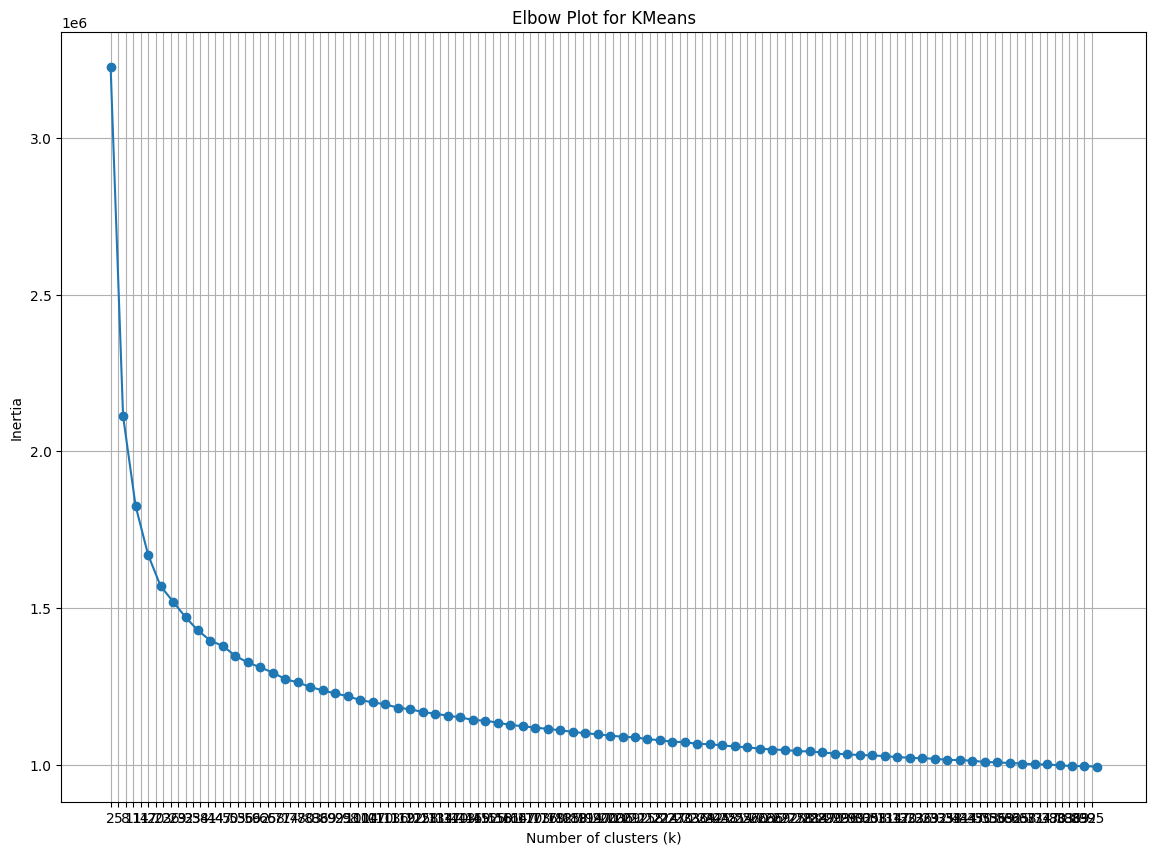

In [44]:
plt.figure(figsize=(14, 10))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Plot for KMeans')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(np.arange(min(k_values), max(k_values)+1, 3))
plt.grid(True)
plt.show()

In [45]:
def res1(k, X_train=x_train, X_test=x_test, y_train_dum=y_train_labelled, y_test_dum=y_test_labelled, clss_lst=class_names):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    centroids = kmeans.cluster_centers_                        # KMeans clustering
    
    
    data_cen = []
    y_lab = []
    for cen in centroids:
        dis = cdist([cen], X_train)
        closest_ind = np.argmin(dis)
        cen1 = X_train.iloc[closest_ind].values
        p = y_train_dum.iloc[closest_ind].values
        data_cen.append(cen1)
        y_lab.append(p)
    y_lab1=[]
    for x in X_train.values:
        dis = cdist([x], data_cen)
        ind=np.argmin(dis)
        y_lab1.append(y_lab[ind])
                                                                                    # Fit MLP using centroids
    mlp = MLPClassifier()  
    mlp.fit(X_train, y_lab1)

                                                                              # Predict using MLP on test data
    y_pred = mlp.predict(X_test)

                                                                                   # Evaluate MLP performance
    mlp_rpt = classification_report(y_test_dum, y_pred, output_dict=True,
                                    target_names=clss_lst, zero_division=1)
    
    mlp_results1 = pd.DataFrame(mlp_rpt).T
    return mlp_results1

In [49]:
res1(20)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,precision,recall,f1-score,support
T-shirt/top,0.574766,0.9840,0.725664,1000.0000
Trouser,0.957560,0.7220,0.823261,1000.0000
Pullover,0.532836,0.3570,0.427545,1000.0000
Dress,0.566772,0.5390,0.552537,1000.0000
Coat,0.454777,0.7140,0.555642,1000.0000
Sandal,1.000000,0.0000,0.000000,1000.0000
Shirt,0.277419,0.2150,0.242254,1000.0000
Sneaker,0.544709,0.7310,0.624253,1000.0000
Bag,0.628700,0.7010,0.662884,1000.0000
Ankle boot,0.792079,0.8800,0.833728,1000.0000


In [47]:
res1(100)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,precision,recall,f1-score,support
T-shirt/top,0.756605,0.9450,0.840373,1000.0000
Trouser,0.931416,0.8420,0.884454,1000.0000
Pullover,0.643791,0.3940,0.488834,1000.0000
Dress,0.791786,0.8290,0.809966,1000.0000
Coat,0.517447,0.6080,0.559080,1000.0000
Sandal,0.928819,0.5350,0.678934,1000.0000
Shirt,0.402381,0.5070,0.448673,1000.0000
Sneaker,0.719120,0.8500,0.779102,1000.0000
Bag,0.666050,0.7200,0.691975,1000.0000
Ankle boot,0.992341,0.9070,0.947753,1000.0000


In [52]:
res1(30)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,precision,recall,f1-score,support
T-shirt/top,0.782756,0.9260,0.848374,1000.0000
Trouser,0.955640,0.7540,0.842929,1000.0000
Pullover,0.541191,0.4270,0.477362,1000.0000
Dress,0.689616,0.6110,0.647932,1000.0000
Coat,0.449688,0.5050,0.475742,1000.0000
Sandal,0.893004,0.2170,0.349155,1000.0000
Shirt,0.328008,0.3490,0.338178,1000.0000
Sneaker,0.519267,0.8220,0.636469,1000.0000
Bag,0.524832,0.7820,0.628112,1000.0000
Ankle boot,0.991765,0.8430,0.911351,1000.0000


In [53]:
res1(50)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,precision,recall,f1-score,support
T-shirt/top,0.682094,0.8990,0.775669,1000.0000
Trouser,0.938063,0.8330,0.882415,1000.0000
Pullover,0.584877,0.3790,0.459951,1000.0000
Dress,0.793255,0.5410,0.643282,1000.0000
Coat,0.557398,0.4370,0.489910,1000.0000
Sandal,0.988095,0.1660,0.284247,1000.0000
Shirt,0.313877,0.5700,0.404830,1000.0000
Sneaker,0.591117,0.9050,0.715132,1000.0000
Bag,0.635990,0.7740,0.698241,1000.0000
Ankle boot,0.931435,0.8830,0.906571,1000.0000


In [48]:
res1(200)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,precision,recall,f1-score,support
T-shirt/top,0.717656,0.9430,0.815039,1000.0000
Trouser,0.947883,0.8730,0.908902,1000.0000
Pullover,0.630936,0.4650,0.535406,1000.0000
Dress,0.806804,0.6640,0.728470,1000.0000
Coat,0.545987,0.6530,0.594718,1000.0000
Sandal,0.949367,0.4500,0.610583,1000.0000
Shirt,0.426271,0.5030,0.461468,1000.0000
Sneaker,0.711682,0.8590,0.778432,1000.0000
Bag,0.634365,0.7790,0.699282,1000.0000
Ankle boot,0.988043,0.9090,0.946875,1000.0000


In [129]:
def res2(k, X_train = x_train, X_test = x_test, y_train_dum = y_train_labelled, y_test_dum = y_test_labelled, clss_lst = class_names):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    centroids = kmeans.cluster_centers_
    
    data_cen = []
    y_lab = []
    for cen in centroids:
        dis = cdist([cen], X_train)
        closest_ind = np.argmin(dis)
        cen1 = X_train.iloc[closest_ind].values
        p = y_train_dum.iloc[closest_ind].values
        data_cen.append(tuple(cen1))
        y_lab.append(p)
    y_lab = [item[0] for item in y_lab]
    distan = dict.fromkeys(data_cen, [])

    i = -1
    for x in X_train.values:
        i += 1
        d = cdist([x], data_cen)
        inde = np.argmin(d[0])
        distan[tuple(data_cen[inde])] = distan[tuple(data_cen[inde])] + [[d[0][inde], i]]

    new_x, new_y, i = [], [], -1
    for cen in distan:
        i += 1
        cutoff = np.percentile([a for (a, b) in distan[cen]], 20)
        for tu in distan[cen]:
            if tu[0] <= cutoff:
                new_x.append(X_train.iloc[tu[1], :])
                new_y.append(y_lab[i])

    mlp = MLPClassifier()  
    mlp.fit(new_x, new_y)
    y_pred = mlp.predict(X_test)
    mlp_rpt = classification_report(y_test_dum, y_pred, output_dict=True,
                                    target_names=clss_lst, zero_division=1)
    mlp_results1 = pd.DataFrame(mlp_rpt).T
    return mlp_results1

In [128]:
res2(20)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.840292,0.8050,0.822268,1000.0000
Trouser,0.937349,0.7780,0.850273,1000.0000
Pullover,0.506011,0.4630,0.483551,1000.0000
Dress,0.588344,0.6360,0.611245,1000.0000
Coat,0.293855,0.5930,0.392975,1000.0000
Sandal,0.716230,0.6840,0.699744,1000.0000
Shirt,0.351351,0.1820,0.239789,1000.0000
Sneaker,0.714415,0.7880,0.749406,1000.0000
Bag,0.793539,0.5650,0.660047,1000.0000
Ankle boot,0.913187,0.8310,0.870157,1000.0000


In [130]:
res2(30)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.657008,0.9750,0.785024,1000.0000
Trouser,0.914773,0.8050,0.856383,1000.0000
Pullover,0.513514,0.2090,0.297086,1000.0000
Dress,0.661342,0.6210,0.640536,1000.0000
Coat,0.489679,0.4270,0.456197,1000.0000
Sandal,0.968254,0.1830,0.307822,1000.0000
Shirt,0.257305,0.5900,0.358336,1000.0000
Sneaker,0.561232,0.8020,0.660354,1000.0000
Bag,0.803815,0.5900,0.680507,1000.0000
Ankle boot,0.984476,0.7610,0.858432,1000.0000


In [131]:
res2(50)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.758590,0.8610,0.806557,1000.0000
Trouser,0.940248,0.8340,0.883943,1000.0000
Pullover,0.515478,0.3830,0.439472,1000.0000
Dress,0.816953,0.6650,0.733186,1000.0000
Coat,0.453480,0.6190,0.523467,1000.0000
Sandal,0.740038,0.3900,0.510806,1000.0000
Shirt,0.404933,0.3940,0.399392,1000.0000
Sneaker,0.619082,0.8630,0.720969,1000.0000
Bag,0.635640,0.7990,0.708019,1000.0000
Ankle boot,0.967956,0.8760,0.919685,1000.0000


In [132]:
res2(10)

C:\Users\nooha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
T-shirt/top,0.816495,0.7920,0.804061,1000.0000
Trouser,0.897238,0.8120,0.852493,1000.0000
Pullover,0.518849,0.5230,0.520916,1000.0000
Dress,1.000000,0.0000,0.000000,1000.0000
Coat,0.507833,0.3890,0.440544,1000.0000
Sandal,1.000000,0.0000,0.000000,1000.0000
Shirt,0.192747,0.4730,0.273885,1000.0000
Sneaker,0.688361,0.8990,0.779705,1000.0000
Bag,0.520218,0.6690,0.585302,1000.0000
Ankle boot,0.669732,0.8740,0.758351,1000.0000
